# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [21]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [8]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df


,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [9]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()

# voy a crear un diccionario con todos los valores
results = {'Media': media, 'Mediana': mediana, 'Moda': moda}
results

{'Media': np.float64(15.481103166496425),
 'Mediana': np.float64(14.0),
 'Moda': 0    12
 Name: title_length, dtype: int64}

In [12]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()

# agrego el rango al diccionario results
results['Rango'] = rango
results

{'Media': np.float64(15.481103166496425),
 'Mediana': np.float64(14.0),
 'Moda': 0    12
 Name: title_length, dtype: int64,
 'Rango': np.int64(67)}

In [13]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df['title_length'])
curtosis = kurtosis(df['title_length'])
curtosis , asimetria


(np.float64(3.7867237597626007), np.float64(1.5229143965677572))

In [14]:
# Imprime el título más corto y el título más largo según su longitud
maximo = df['title_length'].max()
minimo = df['title_length'].min() 
mas_largo = df[df['title_length'] == maximo ] ['title'].values[0]
mas_corto = df[df['title_length'] == minimo ] ['title'].values[0]
mas_largo, mas_corto




('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb', 'M')

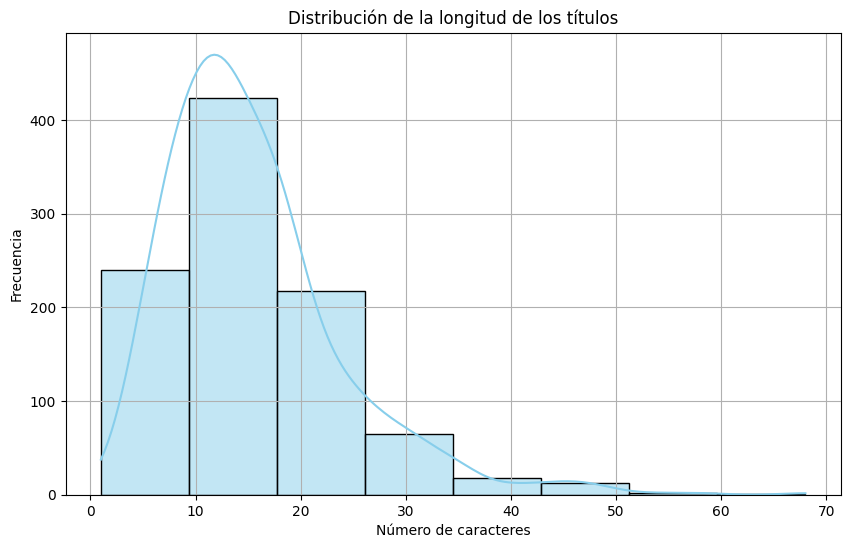

In [15]:
# grafica tus resultados

plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], kde=True, bins=8, color='skyblue')
plt.title('Distribución de la longitud de los títulos')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [23]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
title_lengths = [10, 13, 14, 18, 22]
desviacion_estandar = math.sqrt(varianza)
desviacion_estandar

8.491569282766807

In [28]:
# Calcula la media de los 5 valores
title_lengths = [10, 13, 14, 18, 22]
media = sum(title_lengths) / len(title_lengths)
print(f"La media es: {media}")

La media es: 15.4


In [31]:
# Calcula las diferencias al cuadrado con respecto a la media
title_lengths = [10, 13, 14, 18, 22]
media = 15.4

diferencias_cuadradas = [(x - media) ** 2 for x in title_lengths]
print("Diferencias al cuadrado:", diferencias_cuadradas)


Diferencias al cuadrado: [29.160000000000004, 5.760000000000002, 1.960000000000001, 6.759999999999998, 43.559999999999995]


In [33]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
diferencias_cuadradas = [29.16, 5.76, 1.96, 6.76, 43.56]

varianza = sum(diferencias_cuadradas) / len(diferencias_cuadradas)

desviacion_estandar = math.sqrt(varianza)

print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion_estandar}")

Varianza: 17.44
Desviación estándar: 4.17612260356422
